In [1]:
import pandas as pd

In [44]:
# Load the dataset
df = pd.read_csv(r'C:\Users\rajat\Desktop\Rajat\Study\Project\EDA-Visualization-Project\data\netflix_titles.csv')

In [3]:
# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check the number of rows and columns in the dataset
df.shape

(8807, 12)

In [5]:
#Get a concise summary of the DataFrame including non-null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Get summary statistics for numeric columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
#Check for missing values in all columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#Drop rows where 'rating' or 'duration' is missing
df = df.dropna(subset =['rating', 'duration'])

In [45]:
#Fill missing 'director', 'cast', 'country' with placeholder
df.loc[:, 'director'] = df['director'].fillna('Not Available')
df.loc[:, 'cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Not Specified')
df.loc[:, 'date_added'] = df['date_added'].fillna('Unknown')
df.loc[:, 'rating'] = df['rating'].fillna('Not Rated')
df.loc[:, 'duration']= df['duration'].fillna('Unknown Duration')

In [18]:
#checking missing values again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
#Count how many entries are Movies and how many are TV shows
content_counts = df['type'].value_counts()

In [20]:
print(content_counts)

type
Movie      6126
TV Show    2674
Name: count, dtype: int64


In [21]:
import matplotlib.pyplot as plt

In [23]:
#Set a clean plot style
plt.style.use('ggplot')

Distribution of Content Types

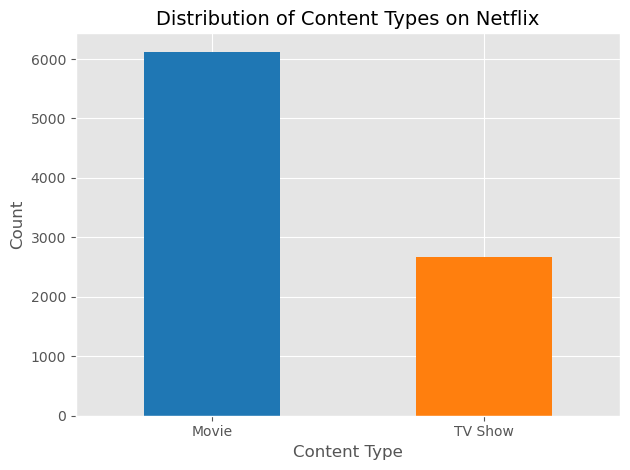

In [29]:
#Create the bar plot
content_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Add title and labels
plt.title('Distribution of Content Types on Netflix', fontsize =14)
plt.xlabel('Content Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 0)

#show the plot
plt.tight_layout()
plt.show()

Content Released Over the Years

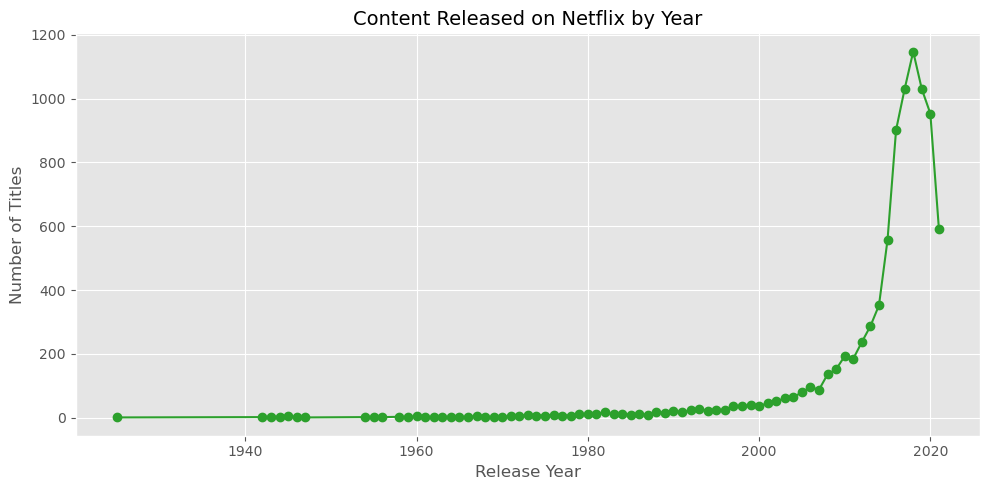

In [37]:
#Count how many titles were released each year
yearly_counts = df['release_year'].value_counts().sort_index()

plt.style.use('ggplot')

#Create the line plot
yearly_counts.plot(kind='line', marker = 'o', color ='#2ca02c', figsize=(10,5))

#Add titles and lables
plt.title('Content Released on Netflix by Year', fontsize =14)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Number of Titles', fontsize = 12)

#show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

Top 10 Countries by Number of Titles

In [47]:
#Count how many titles are produced by each country
country_counts = df['country'].value_counts().head(10)

country_counts

country
United States     2818
India              972
Not Specified      831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [48]:
print(df['country'].unique())

['United States' 'South Africa' 'Not Specified' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'Unit

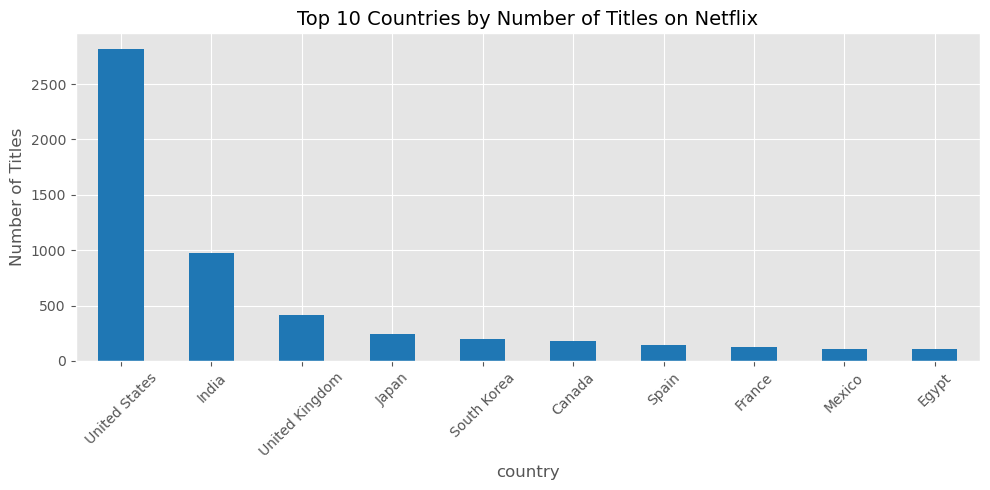

In [49]:
#Filter out placeholder country
filtered_df = df[df['country'] != 'Not Specified']

#Count top 10 countries from the filtered data
country_counts = filtered_df['country'].value_counts().head(10)

plt.style.use('ggplot')

#create the bar chart
country_counts.plot(kind = 'bar', color = '#1f77b4', figsize = (10,5))

#Add titles and axis labels
plt.title('Top 10 Countries by Number of Titles on Netflix', fontsize = 14)
plt.xlabel('country', fontsize =12)
plt.ylabel('Number of Titles', fontsize = 12)

#Show count values clearly
plt.xticks(rotation =45)

#Display the plot
plt.tight_layout()
plt.show()

Top 10 Content Ratings on Netflix

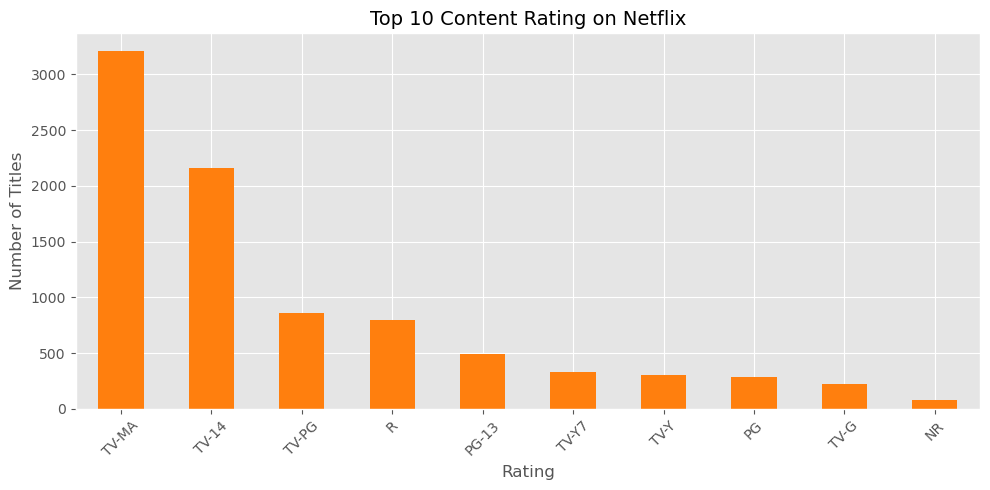

In [53]:
# Count the number of titles for each rating
rating_counts =df['rating'].value_counts().head(10)

plt.style.use('ggplot')

# Create the bar chart
rating_counts.plot(kind='bar', color = '#ff7f0e', figsize = (10,5))

# Add titles and axis labels
plt.title('Top 10 Content Rating on Netflix', fontsize = 14)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Number of Titles', fontsize =12)

#Rotate x-axis lables for better visibility
plt.xticks(rotation = 45)

# Show the plot
plt.tight_layout()
plt.show()

Top 10 Most Common Genres

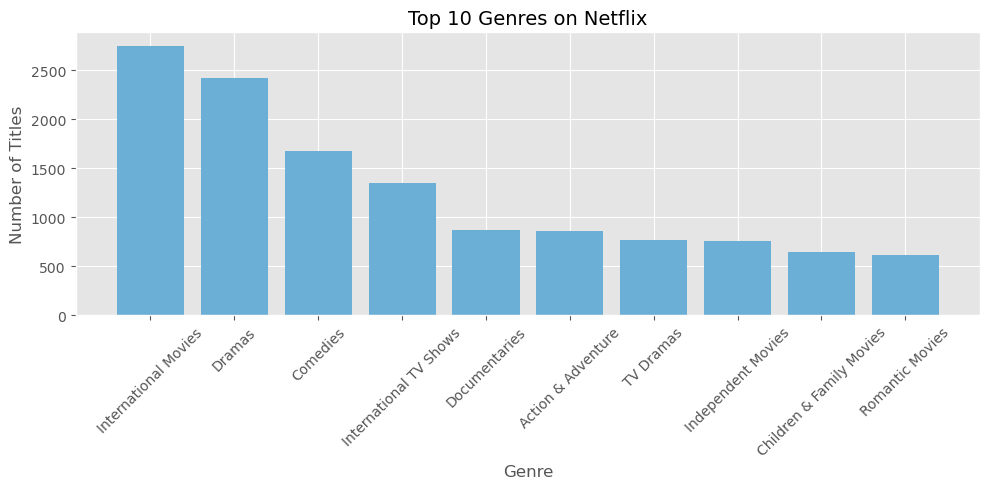

In [55]:
from collections import Counter

# Split the 'listed_in' values by comma and flatten the list
genres_series = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = [genre for sublist in genres_series for genre in sublist]

# Count the genres
genre_counts = Counter(all_genres)
top_genres = dict(genre_counts.most_common(10))

# Plot the top 10 genres
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.bar(top_genres.keys(), top_genres.values(), color='#6baed6')

# Add labels and title
plt.title('Top 10 Genres on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribution of Movie Durations

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rajat\AppData\Local\Temp\ipykernel_33532\638395343.py:10: SyntaxWarning: invalid escape sequence '\d'
  movie_df['duration_minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)


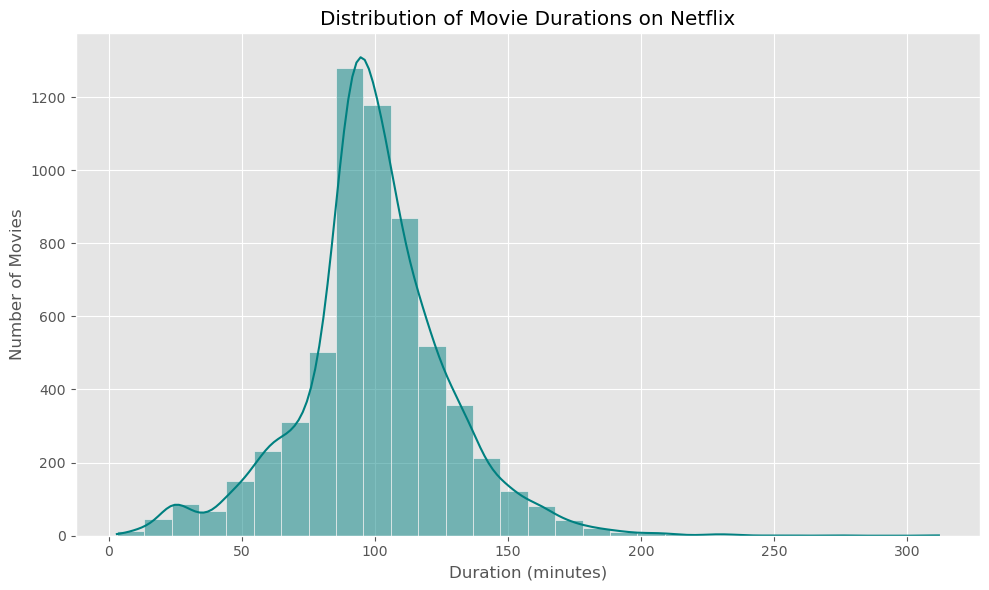

In [59]:
import seaborn as sns

# Fill missing values for duration column with 'Unknown Duration'
df['duration'] = df['duration'].fillna('Unknown Duration')

# Filter for Movies
movie_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration in minutes
movie_df['duration_minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)

# Plot histogram of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(movie_df['duration_minutes'], bins=30, kde=True, color='teal')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

Top 10 Most Frequent Directors

C:\Users\rajat\AppData\Local\Temp\ipykernel_33532\1540705780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


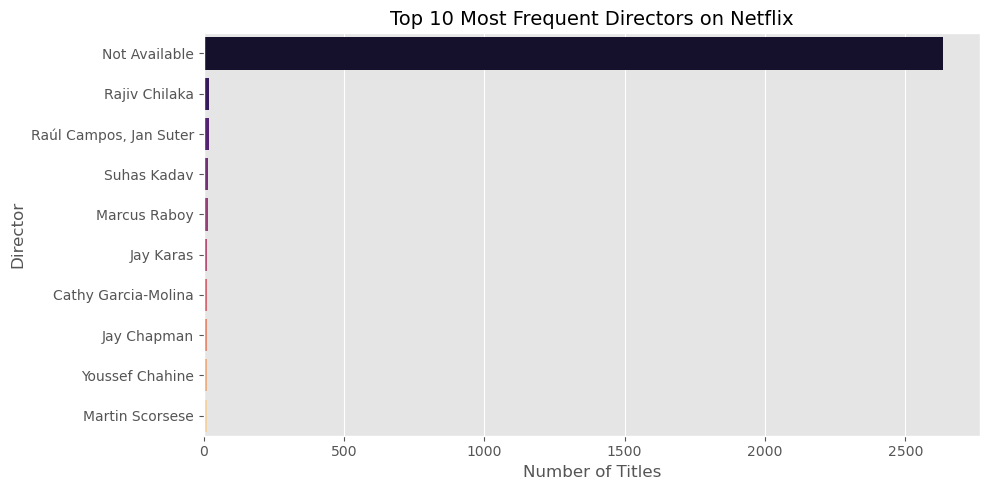

In [60]:
# Count top 10 most frequent directors
top_directors = df['director'].value_counts().head(10)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Most Frequent Directors on Netflix', fontsize=14)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()


Top 10 Most Frequent Cast Members

C:\Users\rajat\AppData\Local\Temp\ipykernel_33532\4120705926.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_cast.values()), y=list(top_cast.keys()), palette='coolwarm')


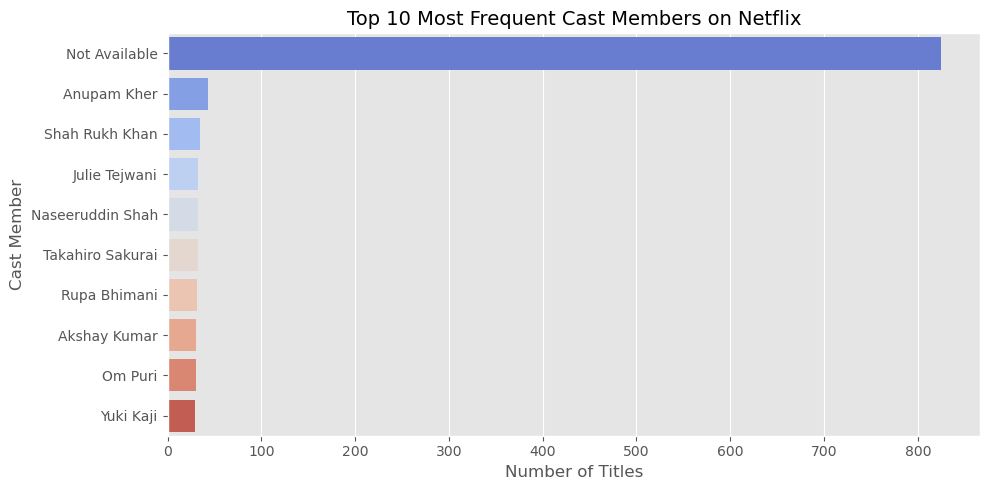

In [61]:
# Split and flatten the 'cast' column into individual names
cast_series = df['cast'].dropna().apply(lambda x: [name.strip() for name in x.split(',')])
all_cast = [actor for sublist in cast_series for actor in sublist]

# Count each actor's appearance
cast_counts = Counter(all_cast)

# Get the top 10 most frequent actors
top_cast = dict(cast_counts.most_common(10))

# Plotting the results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_cast.values()), y=list(top_cast.keys()), palette='coolwarm')
plt.title('Top 10 Most Frequent Cast Members on Netflix', fontsize=14)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Cast Member', fontsize=12)
plt.tight_layout()
plt.show()


Heatmap of Release Year vs Content Rating

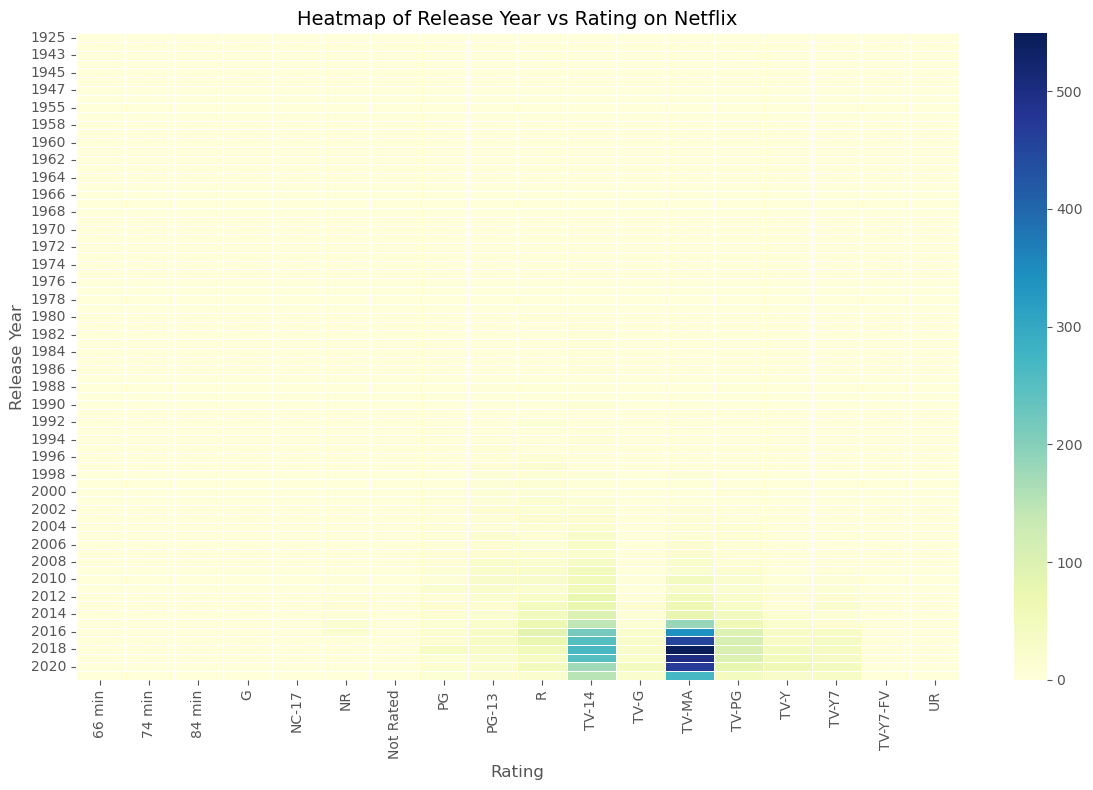

In [62]:
# Create a pivot table with release year and rating
year_rating_pivot = df.pivot_table(index='release_year', columns='rating', aggfunc='size', fill_value=0)

# Plot the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(year_rating_pivot, cmap='YlGnBu', linewidths=0.5)

# Add labels and title
plt.title('Heatmap of Release Year vs Rating on Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.tight_layout()
plt.show()


Word Cloud of Most Frequent Words in Descriptions

In [64]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


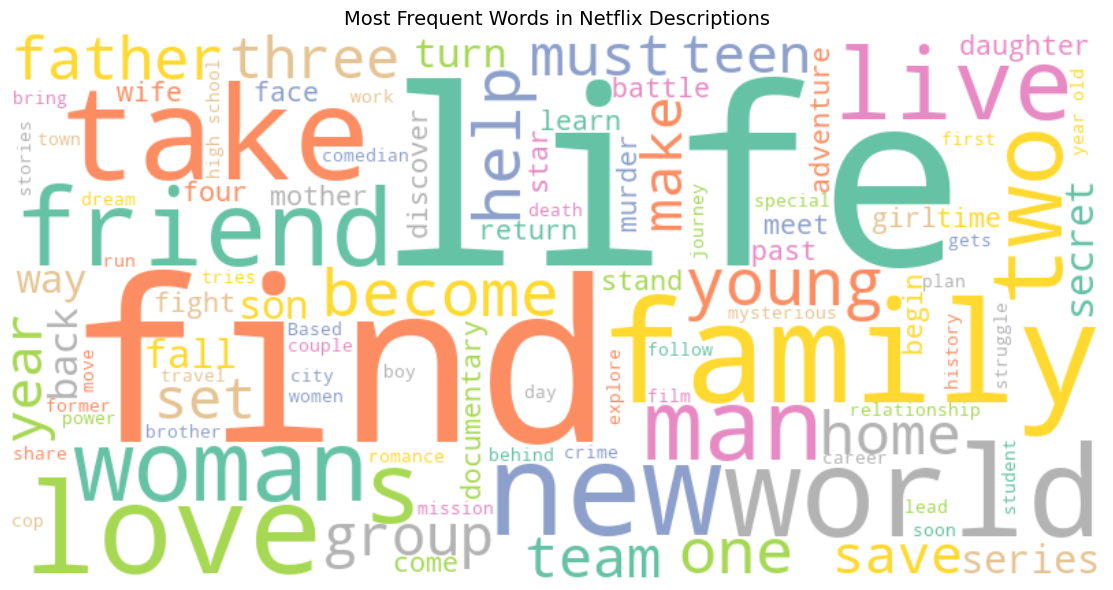

In [65]:
from wordcloud import WordCloud, STOPWORDS

# Combine all descriptions into one text
text = ' '.join(df['description'].dropna())

# Define stopwords to remove common but unhelpful words
stopwords = set(STOPWORDS)

# Create and configure the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='Set2',
    max_words=100
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Netflix Descriptions', fontsize=14)
plt.tight_layout()
plt.show()
